In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder , StandardScaler , LabelEncoder , OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split , GridSearchCV , learning_curve
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report , f1_score , precision_score , recall_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score , roc_curve , auc , precision_recall_curve , average_precision_score , confusion_matrix
from xgboost import XGBClassifier
from sklearn.calibration import calibration_curve

In [69]:
df = pd.read_csv(r"C:\Users\Ameen\Desktop\MyProjects-P\Customer Churn project\archive\Telco_customer_churn.csv")
df

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,2569-WGERO,1,United States,California,Landers,92285,"34.341737, -116.539416",34.341737,-116.539416,Female,...,Two year,Yes,Bank transfer (automatic),21.15,1419.4,No,0,45,5306,NaN
7039,6840-RESVB,1,United States,California,Adelanto,92301,"34.667815, -117.536183",34.667815,-117.536183,Male,...,One year,Yes,Mailed check,84.80,1990.5,No,0,59,2140,NaN
7040,2234-XADUH,1,United States,California,Amboy,92304,"34.559882, -115.637164",34.559882,-115.637164,Female,...,One year,Yes,Credit card (automatic),103.20,7362.9,No,0,71,5560,NaN
7041,4801-JZAZL,1,United States,California,Angelus Oaks,92305,"34.1678, -116.86433",34.167800,-116.864330,Female,...,Month-to-month,Yes,Electronic check,29.60,346.45,No,0,59,2793,NaN


EDA :

In [70]:
df.info()

print("-"*70)

print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   Count              7043 non-null   int64  
 2   Country            7043 non-null   object 
 3   State              7043 non-null   object 
 4   City               7043 non-null   object 
 5   Zip Code           7043 non-null   int64  
 6   Lat Long           7043 non-null   object 
 7   Latitude           7043 non-null   float64
 8   Longitude          7043 non-null   float64
 9   Gender             7043 non-null   object 
 10  Senior Citizen     7043 non-null   object 
 11  Partner            7043 non-null   object 
 12  Dependents         7043 non-null   object 
 13  Tenure Months      7043 non-null   int64  
 14  Phone Service      7043 non-null   object 
 15  Multiple Lines     7043 non-null   object 
 16  Internet Service   7043 

In [71]:
df["Churn Reason"].value_counts()

#check the distribution of churn reasons to identify common patterns
#and understand the main factors behind customer churn

Churn Reason
Attitude of support person                   192
Competitor offered higher download speeds    189
Competitor offered more data                 162
Don't know                                   154
Competitor made better offer                 140
Attitude of service provider                 135
Competitor had better devices                130
Network reliability                          103
Product dissatisfaction                      102
Price too high                                98
Service dissatisfaction                       89
Lack of self-service on Website               88
Extra data charges                            57
Moved                                         53
Limited range of services                     44
Long distance charges                         44
Lack of affordable download/upload speed      44
Poor expertise of phone support               20
Poor expertise of online support              19
Deceased                                       6
Name: c

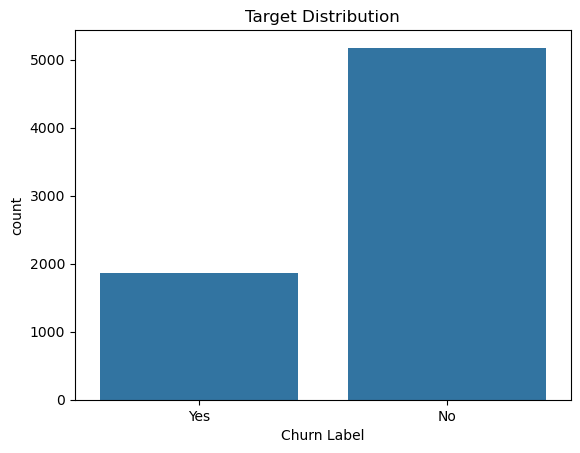

Churn Label
No     0.73463
Yes    0.26537
Name: proportion, dtype: float64

In [72]:
sns.countplot(x = "Churn Label" ,  data = df)
plt.title("Target Distribution")
plt.show()

df["Churn Label"].value_counts(normalize=True)

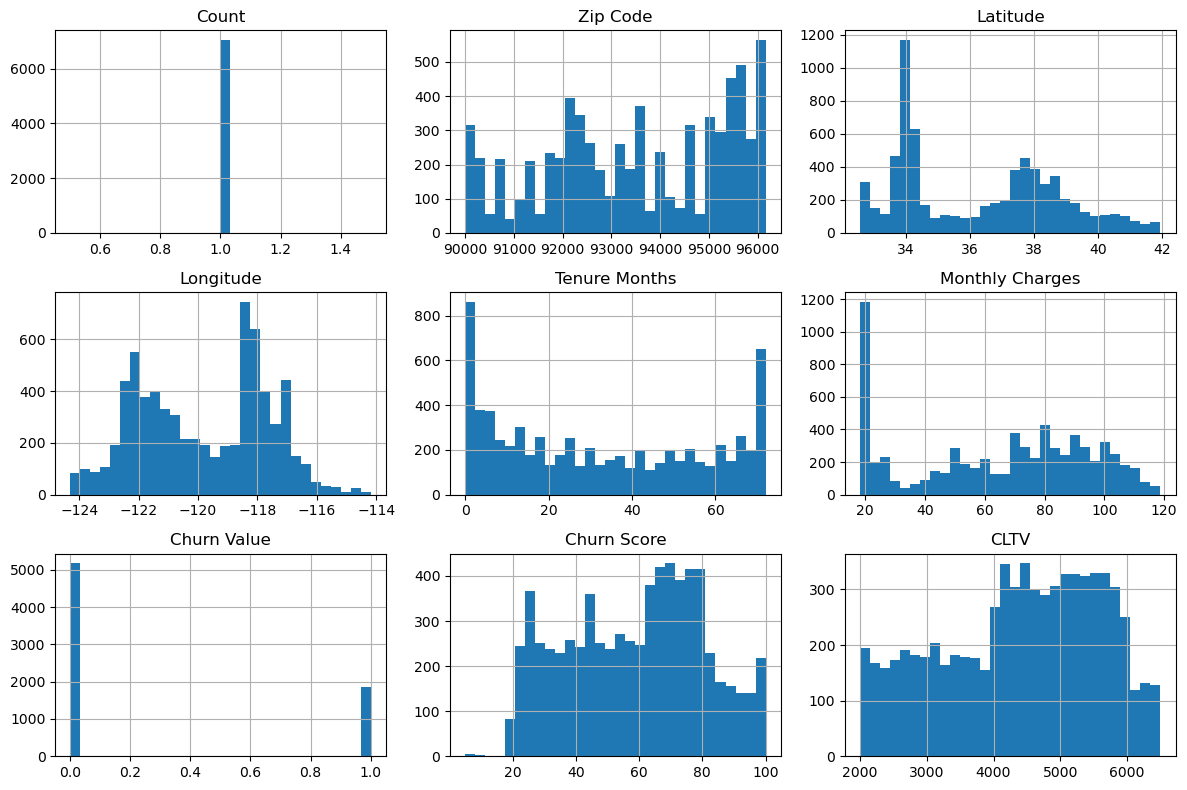

In [73]:
num_cols = df.select_dtypes(include=["int64" , "float64"]).columns

df[num_cols].hist(bins = 30 , figsize = (12 , 8))
plt.tight_layout()
plt.show()

#histograms show that most numerical features are skewed 
#contain outliers, and have different scales 
#which suggests the need for scaling and careful feature handling


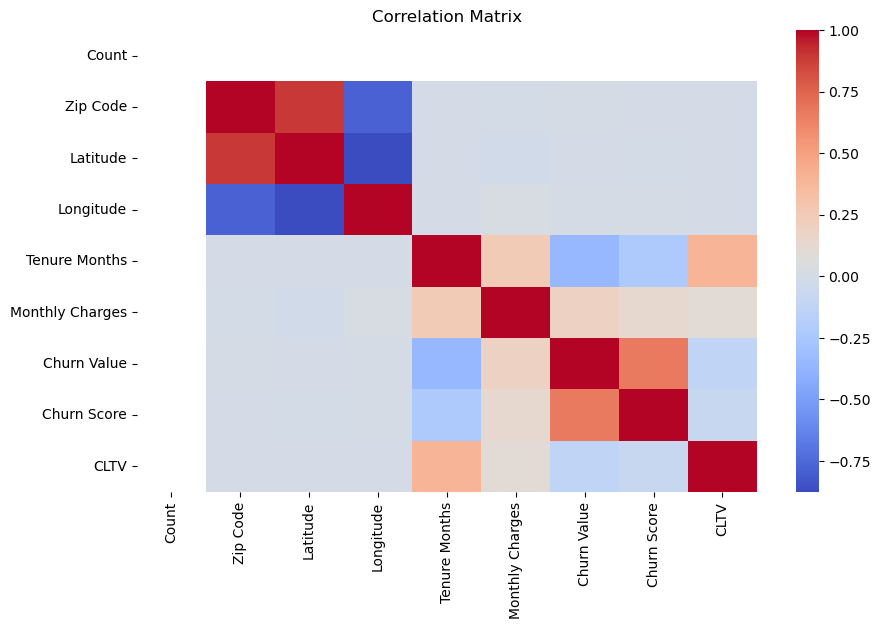

In [74]:
plt.figure(figsize = (10 , 6))
sns.heatmap(df[num_cols].corr(), cmap = "coolwarm" , annot = False)
plt.title("Correlation Matrix")
plt.show()


#the correlation heatmap shows mostly weak to moderate relationships
#between numerical features , indicating low multicollinearity


In [75]:
cat_cols = df.select_dtypes(include=["object" , "category"]).columns
target = "Churn Value" 

In [76]:
def check_outliers(df):
    
    ignore_cols = [
        "order_id" , "product_id" , "user_id" ,
        "aisle_id" , "department_id" , "eval_set"
    ]

    numeric_cols = df.select_dtypes(include=[np.number]).columns

    outlier_cols = [col for col in numeric_cols if col not in ignore_cols]

    n_cols = 3
    n_rows = (len(outlier_cols) // n_cols) + 1
    plt.figure(figsize=(20 , 5 * n_rows))

    for i, col in enumerate(outlier_cols):
        plt.subplot(n_rows , n_cols , i + 1)

        plot_data = (
            df[col]
            .dropna()
            .sample(n=min(100_000 , len(df)) , random_state = 42)
        )

        sns.boxplot(x = plot_data , color = "lightblue")
        plt.title(col , fontsize = 12)
        plt.xlabel("")

    plt.tight_layout()
    plt.show()


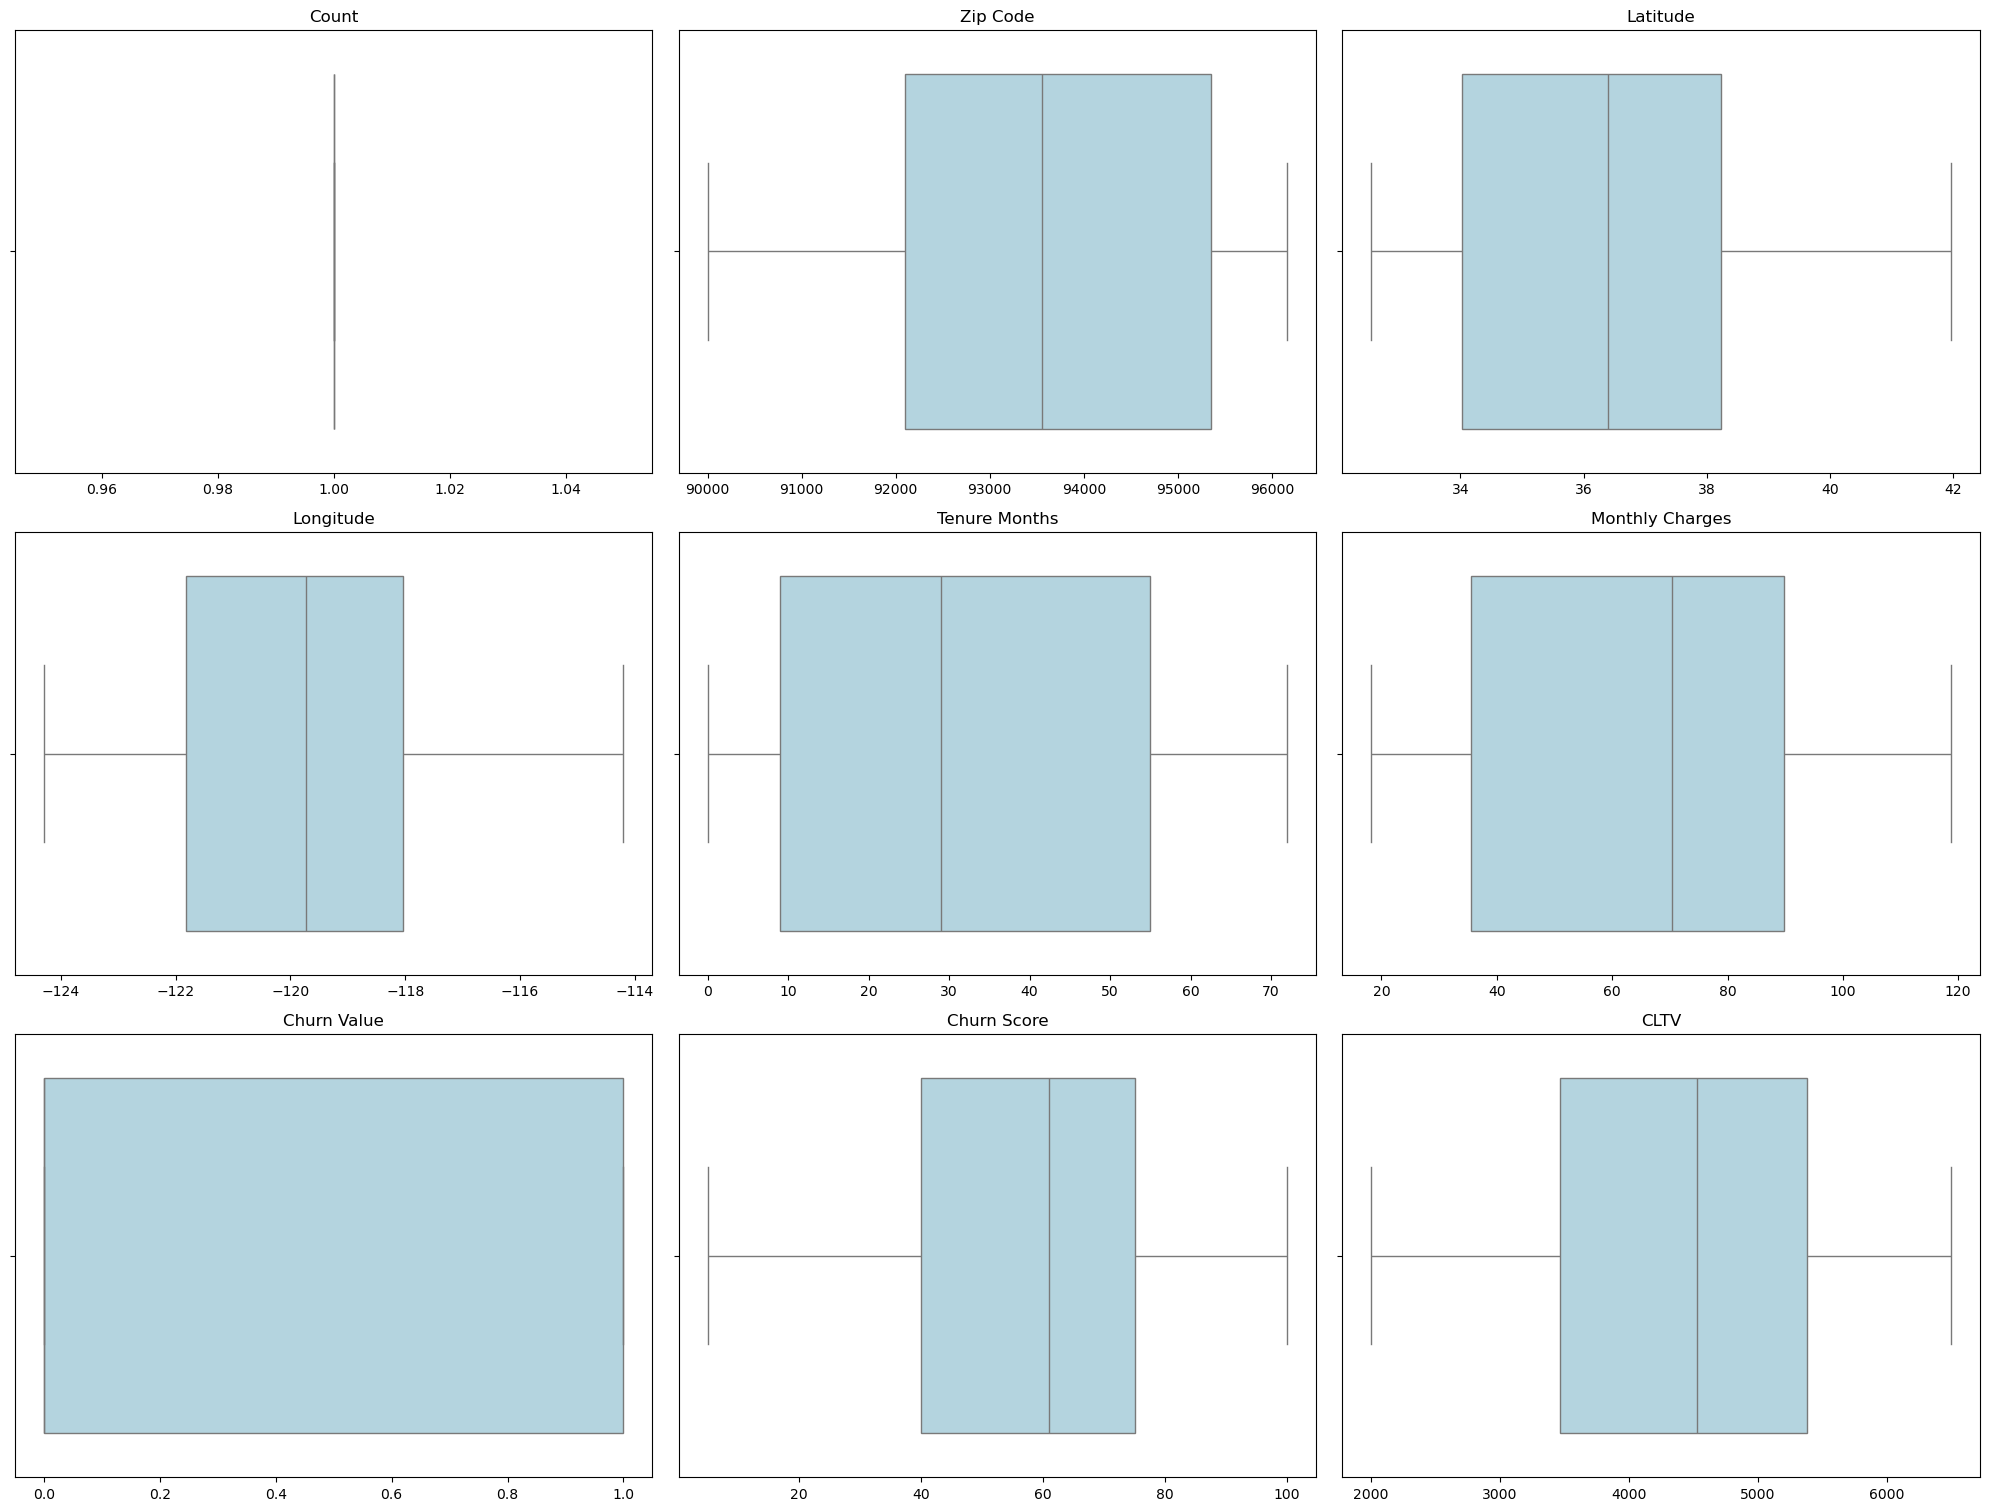

In [77]:
check_outliers(df)

In [78]:
#IMPORTANT:
#churn Value is the target (label)
#churn Score is a precomputed metric derived from churn-related information
#using Churn Score together with Churn Value would cause data leakage
#so Churn Score must be excluded from the feature set


#churn Score is NOT the target
#it is a precomputed score based on churn-related information
#using Churn Score together with Churn Value will introduce data leakage
#therefore Churn Score must be dropped before training the model

Data Cleaning :

In [79]:
#churn Score is a precomputed score derived from churn-related information,
#keeping it would cause data leakage.
del df["Churn Score"]

#churn Label is the target variable and should not be used as an input feature.
del df["Churn Label"]

#count does not carry meaningful predictive information (mostly constant / non-informative).
del df["Count"]

#zip Code has high cardinality and acts as a geographic identifier without direct predictive value.
del df["Zip Code"]

#customerID is a unique identifier and does not provide any behavioral or predictive signal.
del df["CustomerID"]

#churn Reason is known only after the churn event occurs,
#including it would result in data leakage.
del df["Churn Reason"]

#city has very high cardinality and weak causal relationship with churn,
#encoding it would add noise and increase dimensionality.
del df["City"]


del df["Country"]
del df["State"]
del df["Lat Long"]
del df["Total Charges"]


In [80]:
cat_cols = df.select_dtypes(include=["object"]).columns

imputer = SimpleImputer(strategy = "most_frequent")
df[cat_cols] = imputer.fit_transform(df[cat_cols])

df.isnull().sum()

Latitude             0
Longitude            0
Gender               0
Senior Citizen       0
Partner              0
Dependents           0
Tenure Months        0
Phone Service        0
Multiple Lines       0
Internet Service     0
Online Security      0
Online Backup        0
Device Protection    0
Tech Support         0
Streaming TV         0
Streaming Movies     0
Contract             0
Paperless Billing    0
Payment Method       0
Monthly Charges      0
Churn Value          0
CLTV                 0
dtype: int64

In [81]:
#there is no outliers to deal with

Preprocessing :

In [82]:
num_cols = df.select_dtypes(include=["int64" , "float64"]).columns.tolist()
num_cols.remove(target)  

df

,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,...,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Churn Value,CLTV
0,33.964131,-118.272783,Male,No,No,No,2,Yes,No,DSL,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,1,3239
1,34.059281,-118.307420,Female,No,No,Yes,2,Yes,No,Fiber optic,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,1,2701
2,34.048013,-118.293953,Female,No,No,Yes,8,Yes,Yes,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,1,5372
3,34.062125,-118.315709,Female,No,Yes,Yes,28,Yes,Yes,Fiber optic,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,1,5003
4,34.039224,-118.266293,Male,No,No,Yes,49,Yes,Yes,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,1,5340
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,34.341737,-116.539416,Female,No,No,No,72,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),21.15,0,5306
7039,34.667815,-117.536183,Male,No,Yes,Yes,24,Yes,Yes,DSL,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,0,2140
7040,34.559882,-115.637164,Female,No,Yes,Yes,72,Yes,Yes,Fiber optic,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,0,5560
7041,34.167800,-116.864330,Female,No,Yes,Yes,11,No,No phone service,DSL,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,0,2793


In [83]:
df[cat_cols].nunique()

Gender               2
Senior Citizen       2
Partner              2
Dependents           2
Phone Service        2
Multiple Lines       3
Internet Service     3
Online Security      3
Online Backup        3
Device Protection    3
Tech Support         3
Streaming TV         3
Streaming Movies     3
Contract             3
Paperless Billing    2
Payment Method       4
dtype: int64

In [84]:
binary_cols = [ "Gender" , "Senior Citizen" , "Partner" , "Dependents" ,
                 "Phone Service" , "Paperless Billing"
                ]   

low_cols = ["Multiple Lines" , "Internet Service" , "Online Security" , "Online Backup" ,
            "Device Protection" , "Tech Support" , "Streaming TV" , "Streaming Movies" ,
            "Contract" , "Payment Method"
                ]

In [85]:
x = df.drop(target , axis = 1)
y = df[target]

x_train , x_test , y_train , y_test = train_test_split(x , y , test_size = 0.2 , random_state = 42)


preprocessor = ColumnTransformer(
    transformers=[
        ("encoding" , OneHotEncoder(handle_unknown = "ignore" , sparse_output = False) , low_cols) ,
        ("ordinal_encoding" , OrdinalEncoder() , binary_cols) , 
        ("scaling" , StandardScaler() , num_cols)
    ]
)

FX_train = preprocessor.fit_transform(x_train)
FX_test  = preprocessor.transform(x_test)


Churn Value
0    0.739262
1    0.260738
Name: proportion, dtype: float64


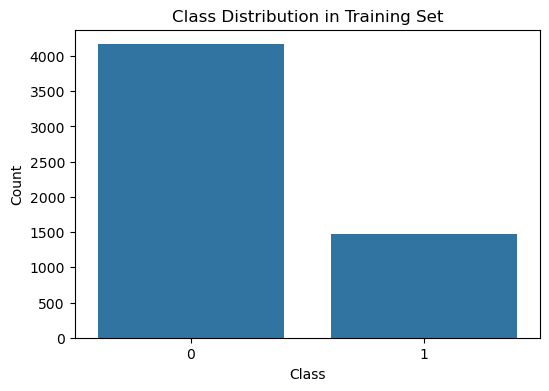

In [86]:
print(y_train.value_counts(normalize=True))

plt.figure(figsize=(6 , 4))
sns.countplot(x=y_train)
plt.title("Class Distribution in Training Set")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()


models preparation :

In [87]:
smote = SMOTE(random_state=42)
smote_xtrain , smote_ytrain = smote.fit_resample(FX_train , y_train) 
print(smote_ytrain.value_counts())

Churn Value
0    4165
1    4165
Name: count, dtype: int64


In [88]:
model_original = RandomForestClassifier(n_estimators = 50 , max_depth = 20 , class_weight = "balanced" , n_jobs = -1)

model_original.fit(FX_train , y_train)

pred_O = model_original.predict(FX_test)
print(classification_report(y_test , pred_O))
print(model_original.score(FX_test , y_test))

print("----------------------------------------------------------------")

model_smote = RandomForestClassifier(n_estimators = 50 , max_depth = 20 , n_jobs = -1)
model_smote.fit(smote_xtrain , smote_ytrain)

pred_S = model_smote.predict(FX_test)
print(classification_report(y_test , pred_S))
print(model_smote.score(FX_test , y_test))

#we trained two models to handle class imbalance:
#1) Using class_weight="balanced" to keep the data realistic
#2) Using SMOTE to improve minority class recall
#although SMOTE improved recall for churned customers
#we selected class_weight as the final approach to avoid synthetic samples
#and keep the model closer to real-world customer behavior


              precision    recall  f1-score   support

           0       0.82      0.90      0.86      1009
           1       0.68      0.51      0.58       400

    accuracy                           0.79      1409
   macro avg       0.75      0.71      0.72      1409
weighted avg       0.78      0.79      0.78      1409

0.7920511000709723
----------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.86      0.87      0.86      1009
           1       0.66      0.63      0.64       400

    accuracy                           0.80      1409
   macro avg       0.76      0.75      0.75      1409
weighted avg       0.80      0.80      0.80      1409

0.8019872249822569


In [89]:
def learning_curves_cls(model , x_train , y_train , cv):

    train_sizes=np.linspace(0.1 , 1.0 , 5)

    train_sizes , train_scores , test_scores = learning_curve(
        model , 
        x_train , y_train ,
        cv = cv , n_jobs = -1 
    )

    train_mean = np.mean(train_scores , axis = 1)
    train_std  = np.std(train_scores , axis = 1)
    test_mean  = np.mean(test_scores , axis = 1)
    test_std   = np.std(test_scores , axis = 1)

    plt.figure()
    plt.title("Learning Curve (Full Data)")
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    plt.grid()

    #  المعادله هاي عشان ارسم التباين
    plt.fill_between(train_sizes , train_mean - train_std , train_mean + train_std , alpha = 0.1 , color = "r")
    plt.fill_between(train_sizes , test_mean - test_std , test_mean + test_std , alpha = 0.1 , color = "g")

    plt.plot(train_sizes , train_mean , 'o-' , color = "r" , label = "Training score")
    plt.plot(train_sizes , test_mean , 'o-' , color = "g" , label = "Cross-validation score")

    plt.legend(loc = "best")
    plt.show()

In [90]:
def evaluate_classification_model(model, X_test, y_test, model_name="Model"):
    
    y_pred = model.predict(X_test)
    y_probs = model.predict_proba(X_test)[:, 1]

    # 2  Metrics
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    ap = average_precision_score(y_test, y_probs)
    fpr, tpr, _ = roc_curve(y_test, y_probs)
    roc_auc = auc(fpr, tpr)

    #
    print(f"\n {model_name} Final Report:")

    print(f"\nAccuracy: {acc:.4f} | Precision: {prec:.4f} | Recall: {rec:.4f} | F1: {f1:.4f} | AUC-ROC: {roc_auc:.4f} | Avg Precision: {ap:.4f}")
    print("=" *50)
    fig, axes = plt.subplots(5, 1, figsize=(10, 35))

    # 1. Confusion Matrix Raw Counts
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[0], annot_kws={"size": 16})
    axes[0].set_title("1. Confusion Matrix Raw Counts", fontsize=16, pad=15)
    axes[0].set_xlabel("Predicted", fontsize=12)
    axes[0].set_ylabel("Actual", fontsize=12)

    # 2 Confusion Matrix Normalized
    cm_norm = confusion_matrix(y_test, y_pred, normalize='true')
    sns.heatmap(cm_norm, annot=True, fmt='.2%', cmap='Greens', ax=axes[1], annot_kws={"size": 16})
    axes[1].set_title("2. Confusion Matrix Normalized ", fontsize=16, pad=15)
    axes[1].set_xlabel("Predicted", fontsize=12)
    axes[1].set_ylabel("Actual", fontsize=12)

    # 3. ROC Curve
    axes[2].plot(fpr, tpr, color='darkorange', lw=3, label=f'AUC = {roc_auc:.2f}')
    axes[2].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    axes[2].set_title("3. ROC Curve", fontsize=16, pad=15)
    axes[2].set_xlabel("False Positive Rate", fontsize=12)
    axes[2].set_ylabel("True Positive Rate", fontsize=12)
    axes[2].legend(loc="lower right", fontsize=12)

    # 4 Precision-Recall Curve
    precision, recall, _ = precision_recall_curve(y_test, y_probs)
    axes[3].plot(recall, precision, color='green', lw=3, label=f'AP = {ap:.2f}')
    axes[3].set_title("4. Precision-Recall Curve", fontsize=16, pad=15)
    axes[3].set_xlabel("Recall", fontsize=12)
    axes[3].set_ylabel("Precision", fontsize=12)
    axes[3].legend(loc="lower left", fontsize=12)

    # 5 Calibration Curve Reliability Diagram
    prob_true, prob_pred = calibration_curve(y_test, y_probs, n_bins=10)
    axes[4].plot(prob_pred, prob_true, marker='o', lw=2, label=f'{model_name}')
    axes[4].plot([0, 1], [0, 1], linestyle='--', color='gray', label='Ideal')
    axes[4].set_title("5. Calibration Curve Reliability", fontsize=16, pad=15)
    axes[4].set_xlabel("Predicted Probability", fontsize=12)
    axes[4].set_ylabel("Actual Probability", fontsize=12)
    axes[4].legend(fontsize=12)

    plt.subplots_adjust(hspace=0.4)
    plt.show()

    return  {
        "Model": model_name ,
        "F1": f1 ,
        "AUC": roc_auc ,
        "Accuracy": acc ,
        "Precision": prec ,
        "Recall": rec ,
        "Avg Precision": ap
           }

In [91]:
all_models_results = []

LoR :

In [92]:
LoR = LogisticRegression(
    solver = "liblinear" ,
    class_weight = "balanced" ,
    random_state = 42
)

LoRparam_grid = {
    "C": [0.001 , 0.01 , 0.1 , 1 , 10] ,
    "penalty": ["l1" , "l2"]
}

LoR_grid_search = GridSearchCV(
    estimator = LoR ,
    param_grid = LoRparam_grid ,
    cv = 3 ,
    scoring = "f1" ,
    n_jobs = -1
)

LoR_grid_search.fit(FX_train , y_train)

print("Best Score:" , LoR_grid_search.best_score_)
print("Best Parameters:" , LoR_grid_search.best_params_)


Best Score: 0.6374950750316902
Best Parameters: {'C': 10, 'penalty': 'l1'}


              precision    recall  f1-score   support

           0       0.90      0.73      0.81      1009
           1       0.54      0.80      0.65       400

    accuracy                           0.75      1409
   macro avg       0.72      0.77      0.73      1409
weighted avg       0.80      0.75      0.76      1409

Logistic Accuracy: 0.751596877217885


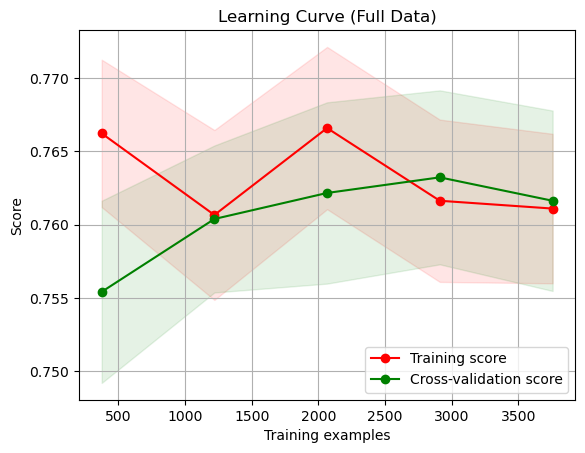

In [93]:
best_C = LoR_grid_search.best_params_["C"]
best_P = LoR_grid_search.best_params_[ "penalty"]

final_LoR_pipeline = make_pipeline(
    preprocessor ,
    LogisticRegression(solver = 'liblinear' , C = best_C , penalty = best_P , class_weight = 'balanced' , random_state = 42)
)

final_LoR_pipeline.fit(x_train, y_train)

y_pred_LoR = final_LoR_pipeline.predict(x_test)

print(classification_report(y_test , y_pred_LoR))
print(f"Logistic Accuracy: {accuracy_score(y_test , y_pred_LoR)}")

learning_curves_cls(final_LoR_pipeline , x_train , y_train , 3) 



#Logistic Regression showed stable performance with minimal variance between training and validation scores
#indicating good generalization
#the model achieved high recall for the minority class making it suitable for churn detection despite moderate precision


 Logistic Regression Final Report:

Accuracy: 0.7516 | Precision: 0.5425 | Recall: 0.7975 | F1: 0.6457 | AUC-ROC: 0.8532 | Avg Precision: 0.6808


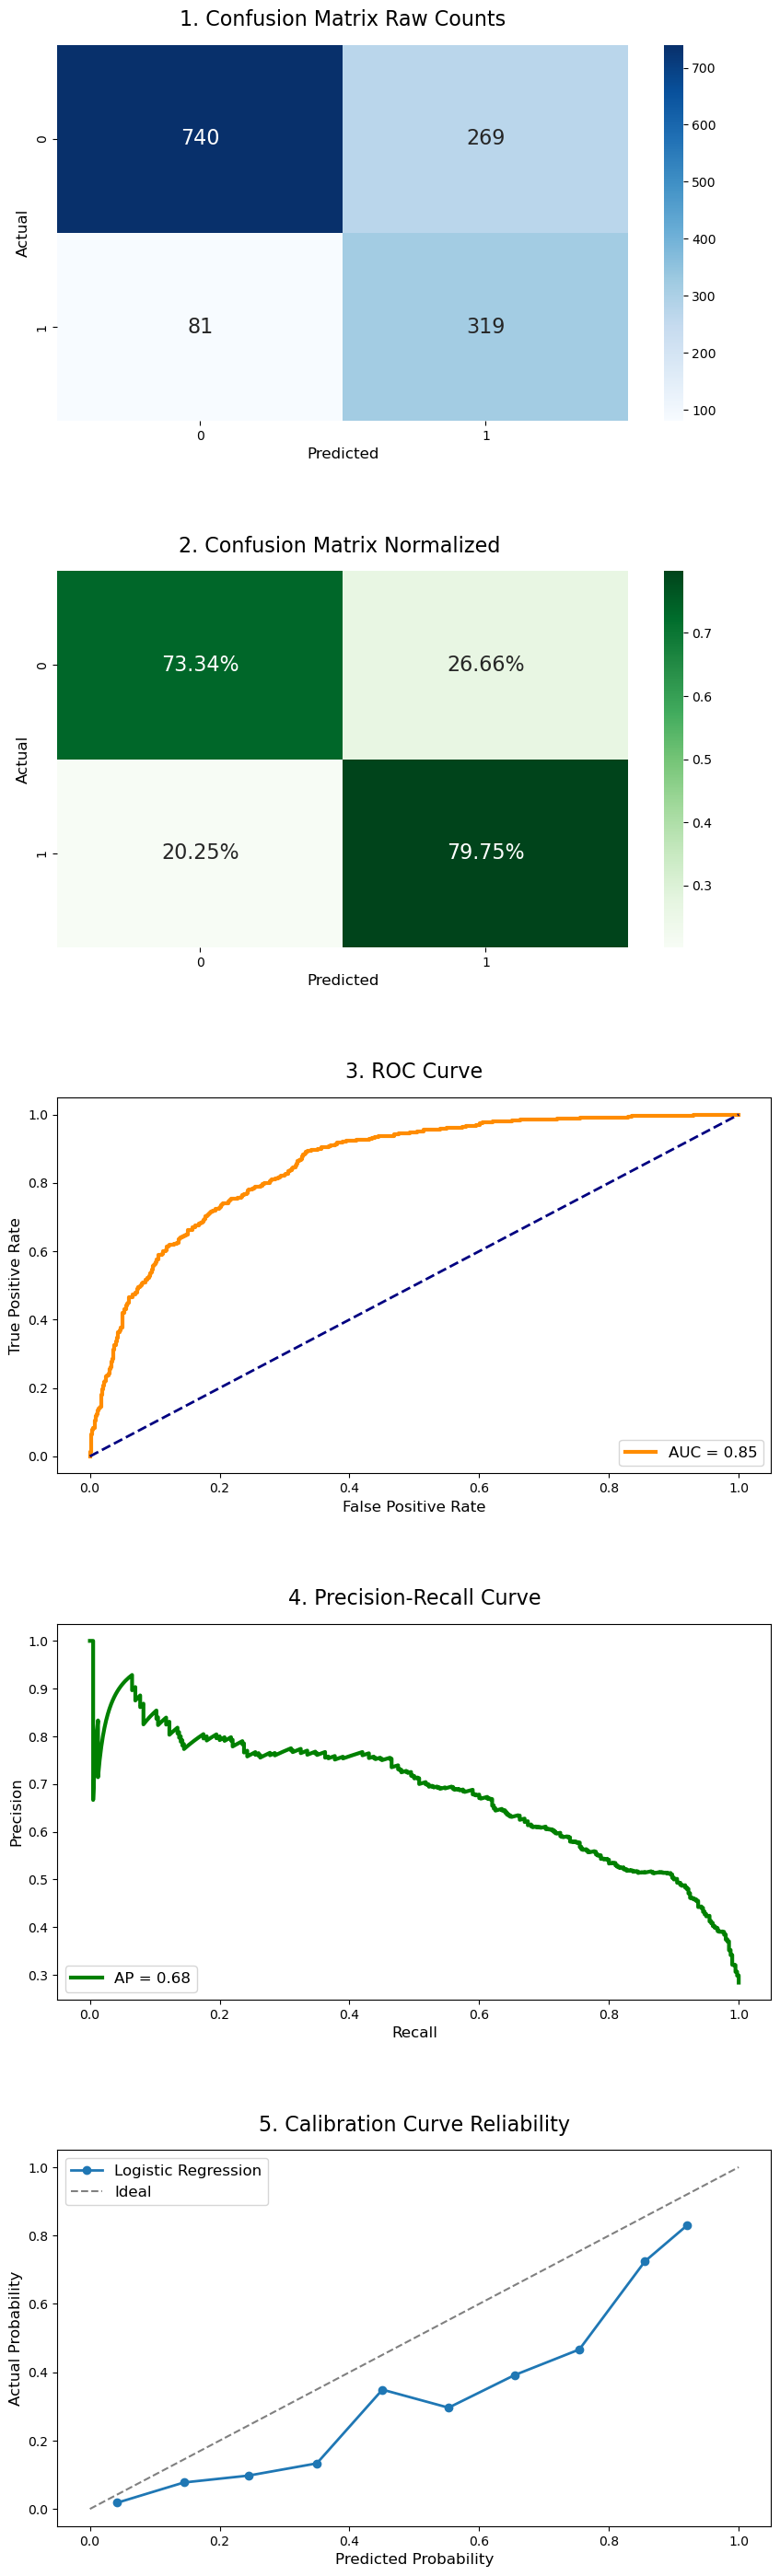

In [94]:
results_LoR = evaluate_classification_model(final_LoR_pipeline , x_test , y_test , model_name = "Logistic Regression")

all_models_results.append(results_LoR)

RF :

In [95]:
RF = RandomForestClassifier(
    random_state = 42
)

RFparam_grid = {
    "n_estimators": [100 , 150 , 200] ,
    "max_depth": [10 , 20] ,
    "min_samples_split": [2 , 5 , 10] ,
    "min_samples_leaf": [1 , 2 , 4] ,
    "class_weight": ['balanced' , 'balanced_subsample']
}

RF_grid_search = GridSearchCV(
    estimator = RF ,
    param_grid = RFparam_grid ,
    cv = 3 ,
    scoring = "f1" , 
    n_jobs = -1
)

RF_grid_search.fit(FX_train , y_train)

print("\nBest Score:" , RF_grid_search.best_score_)
print("Best Parameters:" , RF_grid_search.best_params_)


Best Score: 0.646261654582088
Best Parameters: {'class_weight': 'balanced', 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 100}


              precision    recall  f1-score   support

           0       0.90      0.76      0.82      1009
           1       0.56      0.79      0.66       400

    accuracy                           0.77      1409
   macro avg       0.73      0.77      0.74      1409
weighted avg       0.81      0.77      0.78      1409

Random Forest Accuracy: 0.7672107877927609


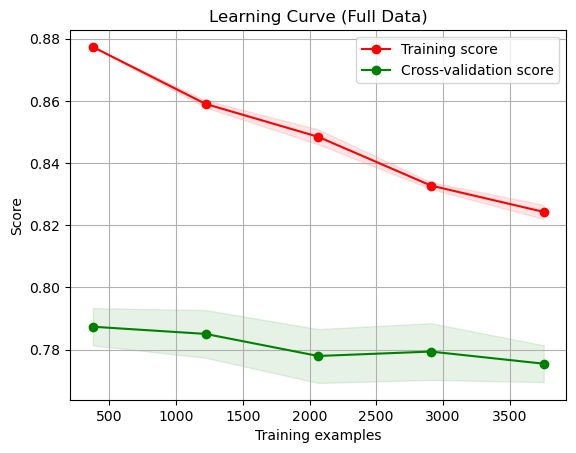

In [96]:
best_N = RF_grid_search.best_params_["n_estimators"]
best_MD = RF_grid_search.best_params_["max_depth"]
best_MSP = RF_grid_search.best_params_[ "min_samples_split"]
best_MSL = RF_grid_search.best_params_["min_samples_leaf"]
best_W = RF_grid_search.best_params_["class_weight"]

final_RF_pipline = make_pipeline(
    preprocessor ,
    RandomForestClassifier(n_estimators = best_N , max_depth = 8 , 
                           min_samples_split = best_MSP , min_samples_leaf = best_MSL ,
                           class_weight = best_W , random_state = 42)

#i manually set max_depth = 8 to reduce overfitting
#when the trees were deeper , the model was learning the training data too well but not generalizing as well on validation data
#by limiting the depth , the model became more stable and achieved better balance between training and validation performance
)

final_RF_pipline.fit(x_train , y_train)

y_pred_RF = final_RF_pipline.predict(x_test)

print(classification_report(y_test , y_pred_RF))
print(f"Random Forest Accuracy: {accuracy_score(y_test , y_pred_RF)}")

learning_curves_cls(final_RF_pipline , x_train , y_train , 3) 



 Random Forest Final Report:

Accuracy: 0.7672 | Precision: 0.5643 | Recall: 0.7900 | F1: 0.6583 | AUC-ROC: 0.8581 | Avg Precision: 0.6862


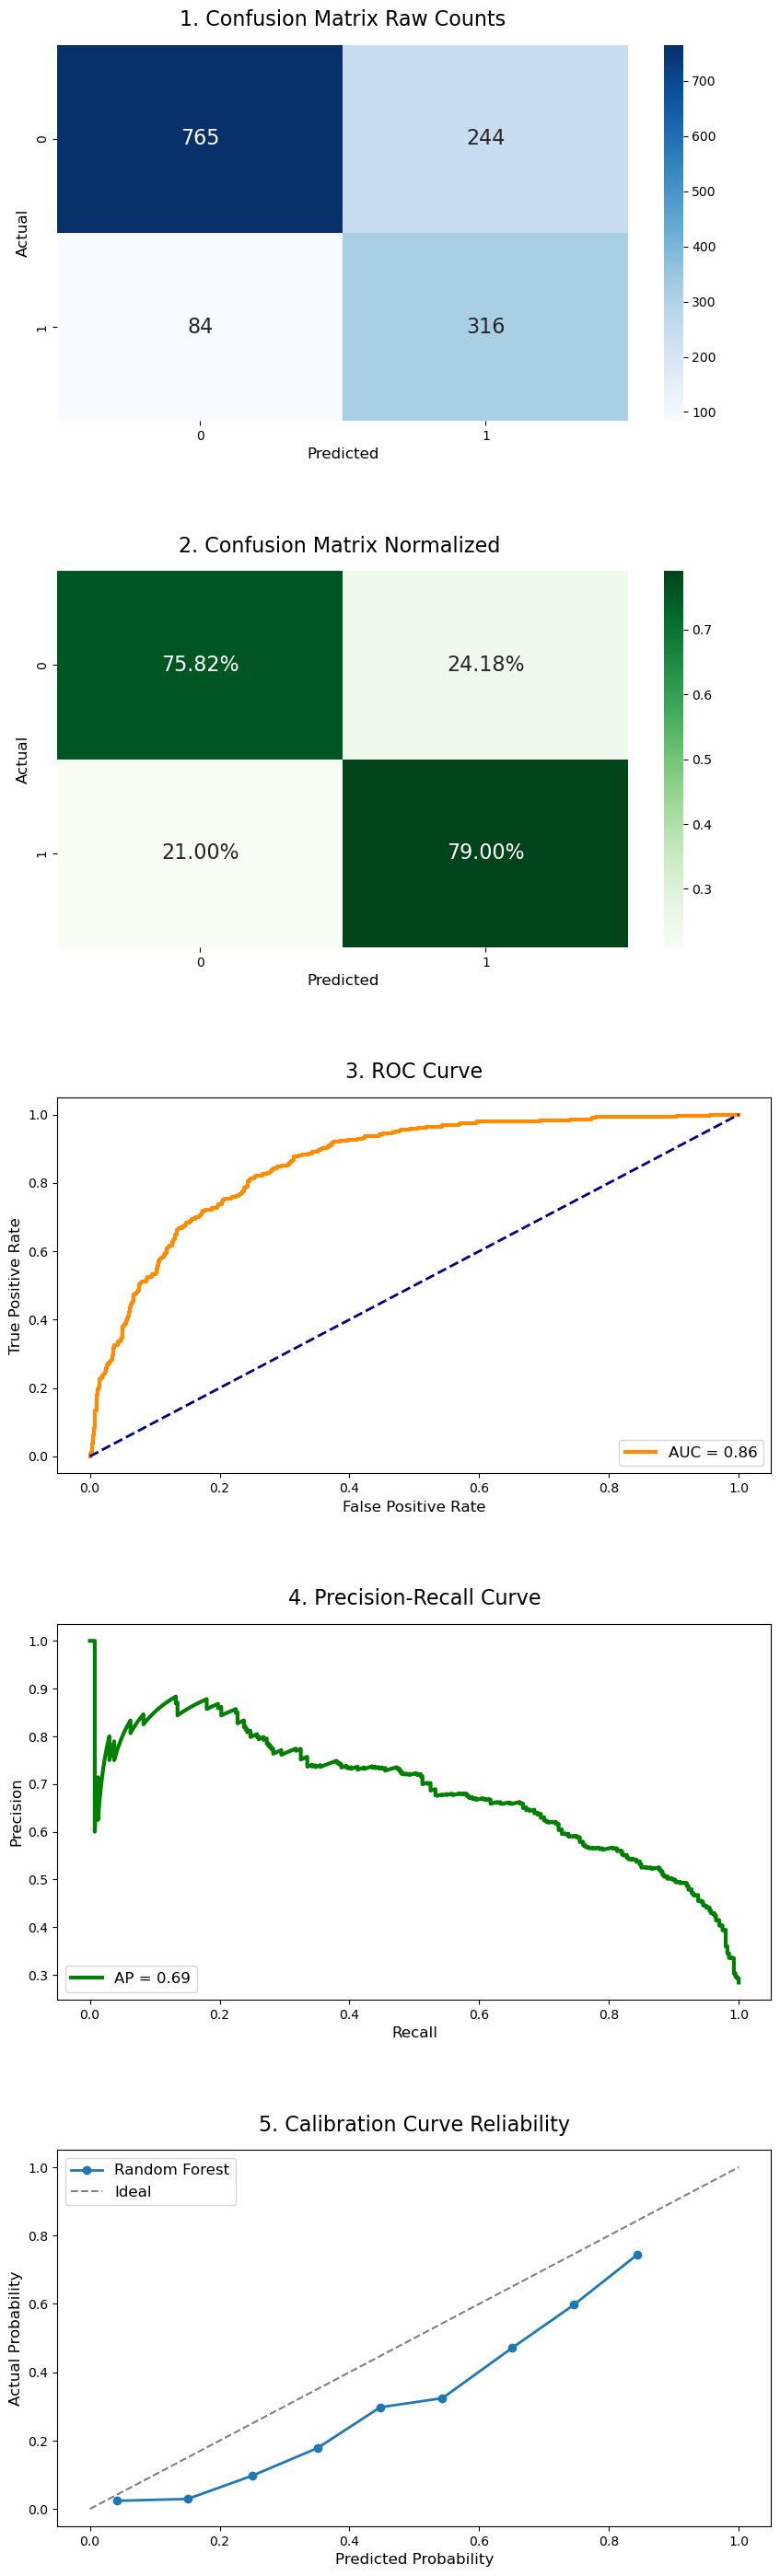

In [97]:
results_RF = evaluate_classification_model(final_RF_pipline , x_test , y_test , model_name = "Random Forest")

all_models_results.append(results_RF)

XGBoost :

In [98]:
xgb = XGBClassifier(
    objective = "binary:logistic" ,
    eval_metric = "logloss" ,
    random_state = 42 ,
    n_jobs = -1
)

xgb_param_grid = {
    "n_estimators": [100 , 200] ,
    "max_depth": [3 , 5 , 8] ,
    "learning_rate": [0.01 , 0.05 , 0.1], 
    "subsample": [0.8 , 1.0] ,
    "colsample_bytree": [0.8 , 1.0]
}


xgb_grid_search = GridSearchCV(
    estimator = xgb ,
    param_grid = xgb_param_grid ,
    cv = 3 ,
    scoring = "f1" ,
    n_jobs = -1 ,
    verbose = 1
)

xgb_grid_search.fit(FX_train , y_train)

print("Best F1 Score:" , xgb_grid_search.best_score_)
print("Best Parameters:" , xgb_grid_search.best_params_)

Fitting 3 folds for each of 72 candidates, totalling 216 fits
Best F1 Score: 0.6000421366916883
Best Parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 200, 'subsample': 0.8}


In [99]:
best_N  = xgb_grid_search.best_params_["n_estimators"]
best_MD = xgb_grid_search.best_params_["max_depth"]
best_LR = xgb_grid_search.best_params_[ "learning_rate"]
best_SS = xgb_grid_search.best_params_["subsample"]
best_CB = xgb_grid_search.best_params_["colsample_bytree"]

final_xgb_pipline = make_pipeline(
    preprocessor ,
    XGBClassifier(n_estimators = best_N , max_depth = best_MD ,
    learning_rate = best_LR , subsample = best_SS , colsample_bytree = best_CB ,
    scale_pos_weight = (y_train == 0).sum() / (y_train == 1).sum() ,
    eval_metric = "logloss" , random_state = 42 ,
    n_jobs = -1)
)

final_xgb_pipline .fit(x_train , y_train)

y_probs = final_xgb_pipline.predict_proba(x_test)[: , 1]

thresholds = np.arange(0.1 , 0.9 , 0.05)
results = []

for t in thresholds:
    y_pred_t = (y_probs >= t).astype(int)

    f1 = f1_score(y_test , y_pred_t)
    precision = precision_score(y_test , y_pred_t)
    recall = recall_score(y_test , y_pred_t)

    results.append((t , f1 , precision , recall))

for r in results:
    print(f"Threshold={r[0]:.2f} | F1={r[1]:.3f} | Precision={r[2]:.3f} | Recall={r[3]:.3f}")

best_threshold , best_f1 , _ , _ = max(results , key = lambda x: x[1])
print("\nBest Threshold:" , best_threshold)
print("Best F1:" , best_f1)

y_pred_xgb_opt = (y_probs >= best_threshold).astype(int)

print("\nXGBoost with Optimized Threshold")
print(classification_report(y_test , y_pred_xgb_opt))


#threshold tuning was performed to optimize the F1-score
#the analysis showed that the optimal threshold is close to 0.5
#indicating that the models default decision boundary is already well-calibrated

Threshold=0.10 | F1=0.553 | Precision=0.385 | Recall=0.983
Threshold=0.15 | F1=0.582 | Precision=0.414 | Recall=0.978
Threshold=0.20 | F1=0.600 | Precision=0.435 | Recall=0.968
Threshold=0.25 | F1=0.618 | Precision=0.458 | Recall=0.950
Threshold=0.30 | F1=0.632 | Precision=0.478 | Recall=0.932
Threshold=0.35 | F1=0.640 | Precision=0.494 | Recall=0.907
Threshold=0.40 | F1=0.650 | Precision=0.513 | Recall=0.885
Threshold=0.45 | F1=0.660 | Precision=0.534 | Recall=0.863
Threshold=0.50 | F1=0.672 | Precision=0.565 | Recall=0.830
Threshold=0.55 | F1=0.661 | Precision=0.579 | Recall=0.770
Threshold=0.60 | F1=0.664 | Precision=0.610 | Recall=0.728
Threshold=0.65 | F1=0.655 | Precision=0.633 | Recall=0.680
Threshold=0.70 | F1=0.640 | Precision=0.664 | Recall=0.618
Threshold=0.75 | F1=0.600 | Precision=0.700 | Recall=0.525
Threshold=0.80 | F1=0.536 | Precision=0.732 | Recall=0.422
Threshold=0.85 | F1=0.446 | Precision=0.781 | Recall=0.312

Best Threshold: 0.5000000000000001
Best F1: 0.672064777


 XGBoost Final Report:

Accuracy: 0.7700 | Precision: 0.5646 | Recall: 0.8300 | F1: 0.6721 | AUC-ROC: 0.8613 | Avg Precision: 0.6936


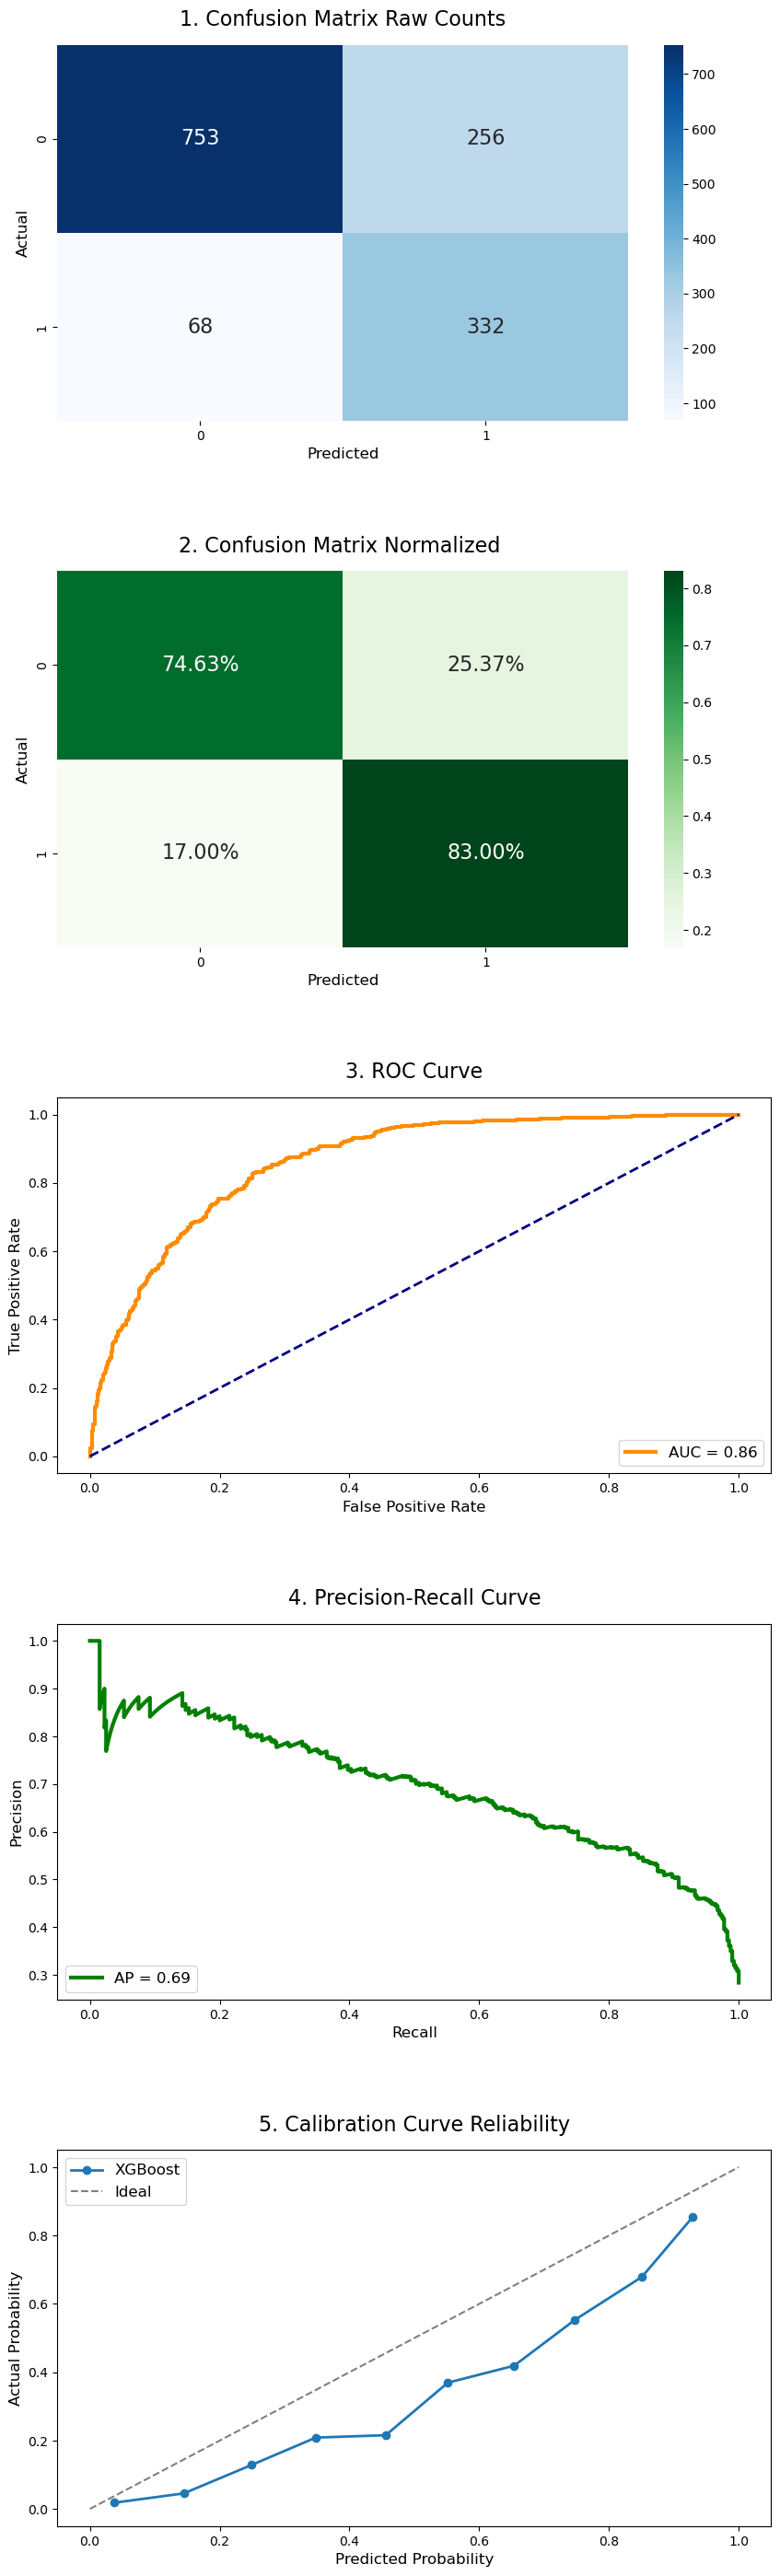

In [101]:
results_xgb = evaluate_classification_model(final_xgb_pipline , x_test , y_test ,  model_name = "XGBoost")

all_models_results.append(results_xgb)

In [102]:
comparison_df = pd.DataFrame(all_models_results)

comparison_df = comparison_df.round(4)

comparison_df = comparison_df.sort_values(by = 'F1' , ascending = False).reset_index(drop=True)

styled_df = comparison_df.style.highlight_max(axis = 0 , color = 'green' , subset = ['Accuracy' , 'Precision' , 'Recall' , 'F1' , 'AUC' , 'Avg Precision'])


styled_df

,Model,F1,AUC,Accuracy,Precision,Recall,Avg Precision
0,XGBoost,0.672100,0.861300,0.770000,0.564600,0.830000,0.693600
1,Random Forest,0.658300,0.858100,0.767200,0.564300,0.790000,0.686200
2,Logistic Regression,0.645700,0.853200,0.751600,0.542500,0.797500,0.680800
